In [0]:
import datetime
import json
import requests
import argparse
import logging
from bs4 import BeautifulSoup
from tabulate import tabulate

FORMAT = '[%(asctime)-15s] %(message)s'
logging.basicConfig(format=FORMAT, level=logging.DEBUG, filename='bot.log', filemode='a')

URL = 'https://www.mohfw.gov.in/'
SHORT_HEADERS = ['Sno', 'State','In','Fr','Cd','Dt']
FILE_NAME = 'corona_india_data.json'
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]

interested_states = ["Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttarakhand","Uttar Pradesh","West Bengal","Andaman and Nicobar Islands","Chandigarh","The Government of NCT of Delhi","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Puducherry"]

current_time = datetime.datetime.now().strftime('%d/%m/%Y %H:%M')
info = []

try:
    response = requests.get(URL).content
    soup = BeautifulSoup(response, 'html.parser')
    header = extract_contents(soup.tr.find_all('th'))
    stats = []
    all_rows = soup.find_all('tr')
    for row in all_rows:
        stat = extract_contents(row.find_all('td'))
        if stat:
            if len(stat) == 5:
                # last row
                stat = ['', *stat]
                stats.append(stat)
            elif any([s.lower() in stat[1].lower() for s in interested_states]):
                stats.append(stat)
    cur_data = {x[1]: {current_time: x[2:]} for x in stats}
except Exception as e:
  print(e)

In [0]:
import pandas as pd

In [0]:
col = ["S_No"	,"NameofState"	,"Total_Confirmed_cases_(Indian_National)","Total_Confirmed_cases_(Foreign_National)","Cured_Discharged/Migrated",	"Death"]
df = pd.DataFrame(stats,columns=col)

In [8]:
df = df[:-1]
df.head()

,S_No,NameofState,Total_Confirmed_cases_(Indian_National),Total_Confirmed_cases_(Foreign_National),Cured_Discharged/Migrated,Death
0,1,Andhra Pradesh,7,0,0,0
1,2,Bihar,2,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,5,Gujarat,29,0,0,1
4,6,Haryana,12,14,11,0


In [9]:
df.drop(["S_No"],inplace=True,axis=1)
df

,NameofState,Total_Confirmed_cases_(Indian_National),Total_Confirmed_cases_(Foreign_National),Cured_Discharged/Migrated,Death
0,Andhra Pradesh,7,0,0,0
1,Bihar,2,0,0,1
2,Chhattisgarh,1,0,0,0
3,Gujarat,29,0,0,1
4,Haryana,12,14,11,0
5,Himachal Pradesh,3,0,0,1
6,Karnataka,33,0,2,1
7,Kerala,60,7,3,0
8,Madhya Pradesh,6,0,0,0
9,Maharashtra,71,3,0,2


In [0]:
df[["Total_Confirmed_cases_(Indian_National)","Total_Confirmed_cases_(Foreign_National)","Cured_Discharged/Migrated",	"Death"]] = df[["Total_Confirmed_cases_(Indian_National)","Total_Confirmed_cases_(Foreign_National)","Cured_Discharged/Migrated",	"Death"]].apply(pd.to_numeric)

In [0]:
df.to_csv("data.csv",index=False)

In [0]:
# importing packages
import pandas as pd
import numpy as np
#from scipy.interpolate import spline
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

In [13]:
df.describe()

,Total_Confirmed_cases_(Indian_National),Total_Confirmed_cases_(Foreign_National),Cured_Discharged/Migrated,Death
count,19.000000,19.000000,19.000000,19.000000
mean,17.210526,1.526316,1.526316,0.421053
std,20.208851,3.485979,3.168744,0.606977
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000
75%,27.500000,1.500000,1.500000,1.000000
max,71.000000,14.000000,11.000000,2.000000


<Figure size 1440x1440 with 0 Axes>

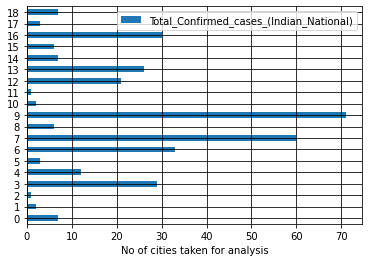

In [14]:
# A bar chart to show from which states, how many cities are taken for examination.
fig = plt.figure(figsize=(20,20))
df[["NameofState","Total_Confirmed_cases_(Indian_National)"]].plot(kind="barh", fontsize = 10)
plt.grid(b=True, which='both', color='Black')
plt.xlabel('No of cities taken for analysis')
plt.show ()

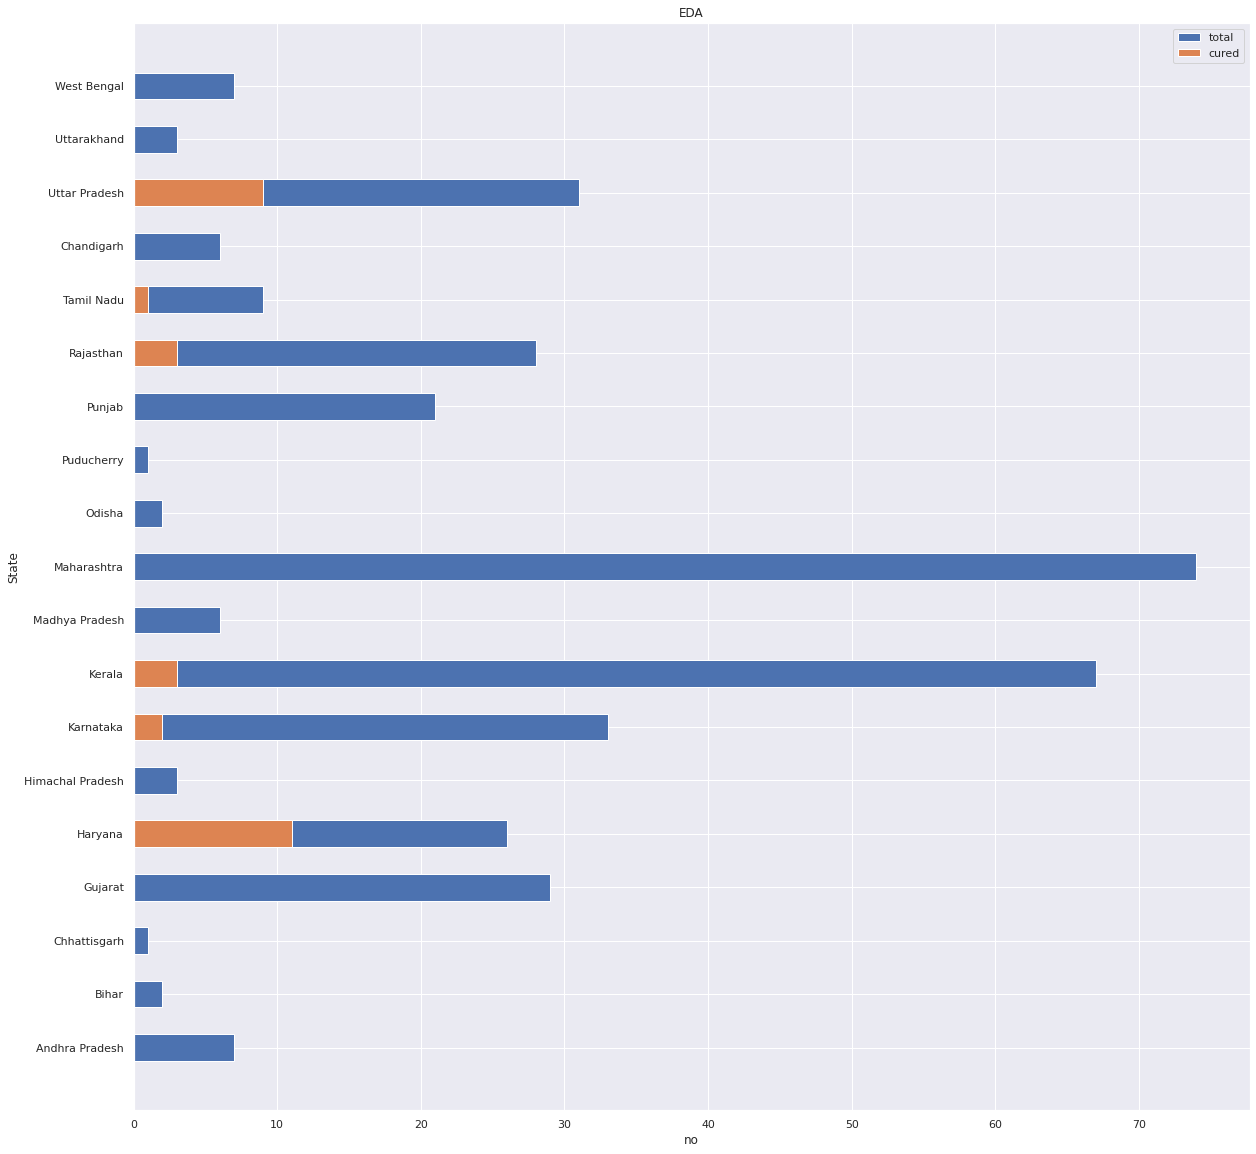

In [15]:
sns.set()
name = df["NameofState"]
count = df["Total_Confirmed_cases_(Indian_National)"]+ df["Total_Confirmed_cases_(Foreign_National)"]
fig = plt.figure(figsize=(20,20))
plt.title("EDA")
plt.barh(name,count,height=0.5,label="total")
plt.barh(name,df["Cured_Discharged/Migrated"],height=0.5,label="cured")
plt.ylabel("State")
plt.xlabel("no")
plt.legend()

In [0]:
df2 = pd.read_csv("long.csv")

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (166 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

     |████████████████████████████████| 2.8MB 2.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702023 sha256=3d14a57e5fa58527d878d9df09a55eaed54fec450fe1c0a4e1b982e2733f7193
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


In [0]:
df2.columns = ['NameofState', 'Latitude', 'Longitude']
final = pd.merge(df, df2, on='NameofState')

Text(0.5, 1.0, 'Infected Cities in India')

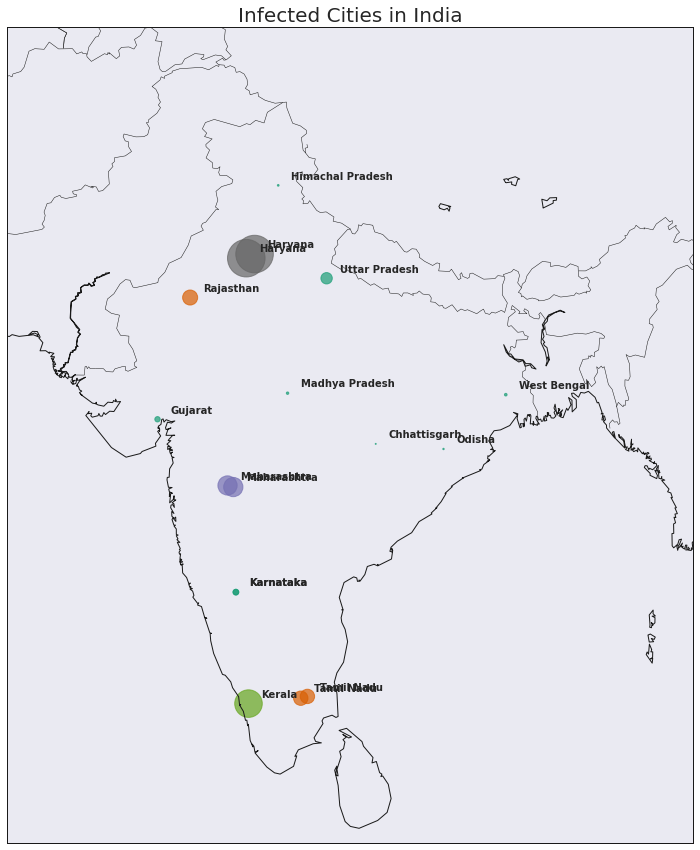

In [20]:
from mpl_toolkits.basemap import Basemap
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(final['Longitude'])
lt=array(final['Latitude'])
pt=array(final["Total_Confirmed_cases_(Indian_National)"]+ final["Total_Confirmed_cases_(Foreign_National)"])
nc=array(final['NameofState'])

x, y = map(lg, lt)
population_sizes = final["Total_Confirmed_cases_(Indian_National)"]+ final["Total_Confirmed_cases_(Foreign_National)"].apply(lambda x: int(x)*100)
plt.scatter(x, y, s=population_sizes, marker="o", c=population_sizes, cmap=cm.Dark2, alpha=0.7)


for ncs, xpt, ypt in zip(nc, x, y):
    plt.text(xpt+60000, ypt+30000, ncs, fontsize=10, fontweight='bold')

plt.title('Infected Cities in India',fontsize=20)